In [98]:
import pandas as pd
import numpy as np

In [99]:
data= pd.read_csv('../data/Master2.csv')

In [100]:
data.head(5)

,Unnamed: 0,sale_day,customer_score,losses_day,Organization,Responsibility,Conduct,Resource_management,Conflict_management,Contribution,Outcome
0,0,2340,2,-29,1,0,1,1,0,0,0
1,1,754,5,-51,1,1,1,1,0,0,1
2,2,4591,2,-2,0,1,1,0,0,1,0
3,3,822,0,-47,0,1,1,1,1,0,1
4,4,2996,3,-30,1,1,0,0,1,0,0


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           4000 non-null   int64
 1   sale_day             4000 non-null   int64
 2   customer_score       4000 non-null   int64
 3   losses_day           4000 non-null   int64
 4   Organization         4000 non-null   int64
 5   Responsibility       4000 non-null   int64
 6   Conduct              4000 non-null   int64
 7   Resource_management  4000 non-null   int64
 8   Conflict_management  4000 non-null   int64
 9   Contribution         4000 non-null   int64
 10  Outcome              4000 non-null   int64
dtypes: int64(11)
memory usage: 343.9 KB


In [102]:
data=data.drop(['Unnamed: 0'],axis=1) 

In [103]:
data.head(10)

,sale_day,customer_score,losses_day,Organization,Responsibility,Conduct,Resource_management,Conflict_management,Contribution,Outcome
0,2340,2,-29,1,0,1,1,0,0,0
1,754,5,-51,1,1,1,1,0,0,1
2,4591,2,-2,0,1,1,0,0,1,0
3,822,0,-47,0,1,1,1,1,0,1
4,2996,3,-30,1,1,0,0,1,0,0
5,649,5,-1,1,1,0,1,1,1,1
6,4804,4,-47,1,1,0,1,1,1,0
7,3655,5,-37,0,1,0,1,1,0,0
8,4041,3,-22,0,1,1,0,0,1,0
9,2238,2,-84,1,1,0,1,1,1,0


In [104]:
dataset = data.loc[:,['sale_day','customer_score','losses_day','Organization','Responsibility','Conduct','Resource_management','Conflict_management','Contribution']].values
labels = data.loc[:, 'Outcome'].values

In [105]:
print(dataset)

[[ 2340     2   -29 ...     1     0     0]
 [  754     5   -51 ...     1     0     0]
 [ 4591     2    -2 ...     0     0     1]
 ...
 [ 4110     0 -1271 ...     0     0     0]
 [ 3451     1  -378 ...     0     0     0]
 [ 4008     1 -1377 ...     0     0     0]]


In [106]:
print(labels)

[0 1 0 ... 0 0 0]


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
dataset_train,dataset_test,labels_train,labels_test = train_test_split(dataset,labels, test_size=0.4)

In [109]:
print(dataset_test)

[[  101     3    -6 ...     1     1     1]
 [  217     4    -3 ...     0     1     0]
 [  766     2 -1465 ...     0     0     0]
 ...
 [  444     2  -268 ...     0     0     0]
 [ 3010     1   -89 ...     1     0     0]
 [  914     1  -637 ...     0     0     0]]


In [110]:
print(labels_test)

[1 1 1 ... 1 0 1]


In [111]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [112]:
#Dropout permite regularizar a la red neuronal durante la etapa de entrenamiento
model = models.Sequential()

model.add(layers.Dense(600, activation='relu', input_shape=(9,)))#Primera capa oculta
#model.add(layers.Dropout(0.1))

model.add(layers.Dense(360, activation='relu')) #segunda capa oculta
#model.add(layers.Dropout(0.1))

model.add(layers.Dense(160, activation='relu')) #segunda capa oculta
#model.add(layers.Dropout(0.1))


model.add(layers.Dense(16, activation='relu')) #tercera capa oculta
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(1,activation='sigmoid'))#Capa de salida de clasificación

In [113]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 600)               6000      
                                                                 
 dense_21 (Dense)            (None, 360)               216360    
                                                                 
 dense_22 (Dense)            (None, 160)               57760     
                                                                 
 dense_23 (Dense)            (None, 16)                2576      
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 282,713
Trainable params: 282,713
Non-trainable params: 0
_________________________________________________________________


In [114]:
from tensorflow.keras import optimizers
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [115]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [116]:
es = EarlyStopping(monitor= 'val_accuracy', mode='max', patience = 20, verbose=1)
mc = ModelCheckpoint('../modeloAI/modeloEmployee2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)


In [117]:
history = model.fit(dataset_train,
                    labels_train,
                    epochs=53,
                    batch_size=1000,
                    validation_data=(dataset_test, labels_test),
                    callbacks = [es, mc])

Epoch 1/53
1/3 [=========>....................] - ETA: 0s - loss: 9.8577 - accuracy: 0.4130
Epoch 00001: val_accuracy improved from -inf to 0.49750, saving model to ../modeloAI\modeloEmployee2.h5
3/3 [==============================] - 1s 118ms/step - loss: 69.9330 - accuracy: 0.5046 - val_loss: 2.5490 - val_accuracy: 0.4975
Epoch 2/53
1/3 [=========>....................] - ETA: 0s - loss: 2.3917 - accuracy: 0.5140
Epoch 00002: val_accuracy improved from 0.49750 to 0.56750, saving model to ../modeloAI\modeloEmployee2.h5
3/3 [==============================] - 0s 52ms/step - loss: 2.5970 - accuracy: 0.4904 - val_loss: 2.1086 - val_accuracy: 0.5675
Epoch 3/53
1/3 [=========>....................] - ETA: 0s - loss: 2.0311 - accuracy: 0.5650
Epoch 00003: val_accuracy did not improve from 0.56750
3/3 [==============================] - 0s 36ms/step - loss: 2.7832 - accuracy: 0.5150 - val_loss: 4.4260 - val_accuracy: 0.4919
Epoch 4/53
1/3 [=========>....................] - ETA: 0s - loss: 4.4382

Epoch 30/53
1/3 [=========>....................] - ETA: 0s - loss: 1.3592 - accuracy: 0.6030
Epoch 00030: val_accuracy did not improve from 0.87437
3/3 [==============================] - 0s 36ms/step - loss: 1.5264 - accuracy: 0.5858 - val_loss: 0.8659 - val_accuracy: 0.6550
Epoch 31/53
1/3 [=========>....................] - ETA: 0s - loss: 0.8176 - accuracy: 0.6650
Epoch 00031: val_accuracy did not improve from 0.87437
3/3 [==============================] - 0s 34ms/step - loss: 0.6965 - accuracy: 0.7133 - val_loss: 0.9154 - val_accuracy: 0.6500
Epoch 32/53
1/3 [=========>....................] - ETA: 0s - loss: 0.9154 - accuracy: 0.6580
Epoch 00032: val_accuracy did not improve from 0.87437
3/3 [==============================] - 0s 36ms/step - loss: 1.2524 - accuracy: 0.6104 - val_loss: 1.3120 - val_accuracy: 0.6044
Epoch 33/53
1/3 [=========>....................] - ETA: 0s - loss: 1.3693 - accuracy: 0.6000
Epoch 00033: val_accuracy did not improve from 0.87437
3/3 [===================

# Para tomar el modelo

In [118]:
import tensorflow
modelbetter = tensorflow.keras.models.load_model('../modeloAI/modeloEmployee2.h5', compile=True)

In [119]:
modelbetter.evaluate(dataset_test, labels_test)

50/50 [==============================] - 0s 2ms/step - loss: 0.5358 - accuracy: 0.8744


[0.5357601642608643, 0.8743749856948853]

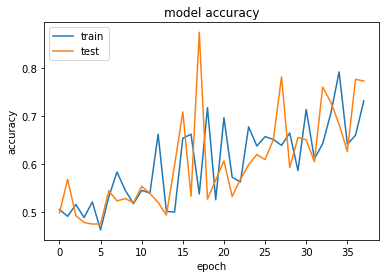

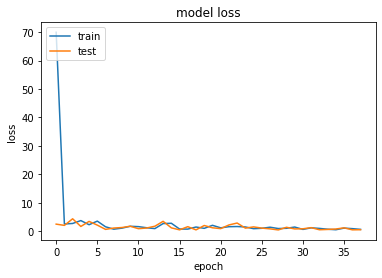

In [120]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 16.) Plot Loss Over Training Period
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [121]:
labelsAi = labels_test
predictions =modelbetter.predict(dataset_test)

In [129]:
dataset_test[-2]

array([3010,    1,  -89,    1,    0,    1,    1,    0,    0], dtype=int64)

In [125]:
labels_test

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [122]:
predictions = (predictions > 0.5)
print(predictions)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [False]
 [ True]]


In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labelsAi, predictions)
cm

array([[653,  39],
       [162, 746]], dtype=int64)

In [124]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=labelsAi, y_pred=predictions, average = 'micro'))
print('Recall: %.3f' % recall_score(y_true=labelsAi, y_pred=predictions, average = 'micro'))
print('F1: %.3f' % f1_score(y_true=labelsAi, y_pred=predictions, average = 'micro'))

Precision: 0.874
Recall: 0.874
F1: 0.874
